# Linear Regression for Sales

**Dataset**

In [75]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/advertising.csv')

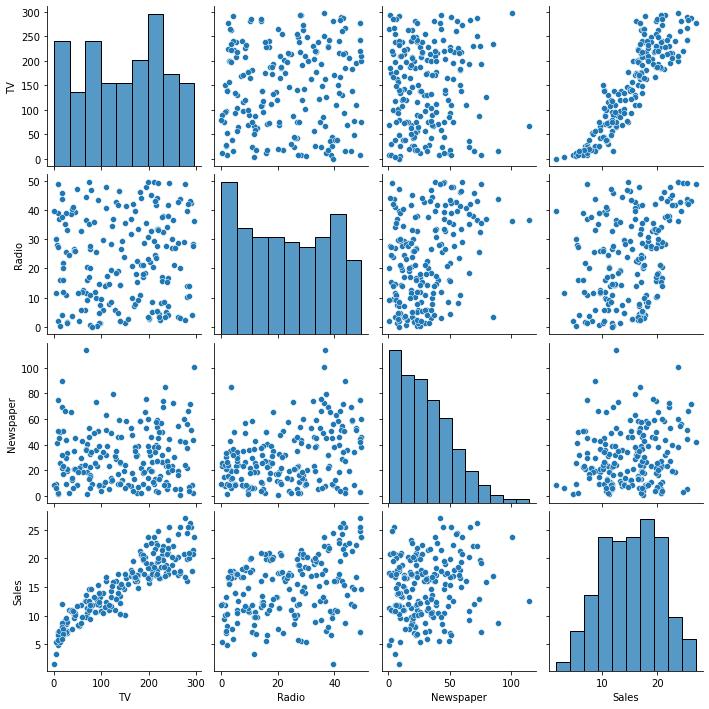

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's do a pairplot to visualize which variables are correlated with Sales the most
sns.pairplot(data)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[:-1]], data['Sales'], test_size = 0.2)

**Scaling the values**

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Training the model**

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

**Evaluation the model**




> 𝑅² score



In [80]:
# 𝑅² is used to analyze how differences in one variable can be explained by a difference in a second variable
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8898748175892103




> Intercept



In [81]:
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0
print('intercept:', model.intercept_)

intercept: 15.110624999999999




> Slope



In [82]:
print('slope:', model.coef_)

slope: [4.57827329 1.44944183 0.03789453]


**Prediction**

In [83]:
y_pred = model.predict(X_text)
y_pred

array([ 980.84822208,  935.65404907,  404.89883997,  594.26771112,
        583.10246817,  327.05829977,  177.4461869 , 1344.78423778,
        860.72944834,  394.1137248 , 1074.17755727, 1177.63722232,
        702.61640937,  461.22686384, 1312.33519721,  841.92559351,
       1201.2480669 , 1110.27537928, 1396.86884956,  441.48404802,
       1219.4437951 ,  472.7808695 , 1428.54912498,  163.01239633,
        715.94439   ,  736.15129589,  261.53507413, 1090.52273825,
        326.79355273, 1062.5927991 ,  583.16775084, 1223.60002899,
        527.52241256,  589.03613066, 1085.81882115, 1275.37743303,
        752.30563319,  770.79780618, 1362.94914051, 1260.16946657])

# Advanced Linear Regression with statsmodels

**Training and Evaluating the Model**

In [84]:
import numpy as np
import statsmodels.api as sm
import pandas.util.testing as tm

x = sm.add_constant(X_train)
model = sm.OLS(Y_train, x)

In [85]:
results = model.fit()

In [86]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     420.2
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.75e-74
Time:                        12:07:03   Log-Likelihood:                -312.91
No. Observations:                 160   AIC:                             633.8
Df Residuals:                     156   BIC:                             646.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1106      0.137    110.343      0.000      14.840      15.381
x1             4.5783      0.138     33.271      0.000       4.306       4.850
x2             1.4494      0.145      9.980      0.000       1.163       1.736
x3             0.0379      0.146      0.260      0.795      -0.250       0.326
==============================================================================
Omnibus:                       13.138   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.675
Skew:                          -0.435   Prob(JB):                     3.24e-05
Kurtosis:                       4.531   Cond. No.                         1.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Prediction**

In [87]:
 
y_pred = results.predict(X_test)
print(y_pred)

ValueError: ignored

# KNN Classification & Logistic Regression

**Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bank_Personal_Loan_Modelling.csv')

In [ ]:
data.head()

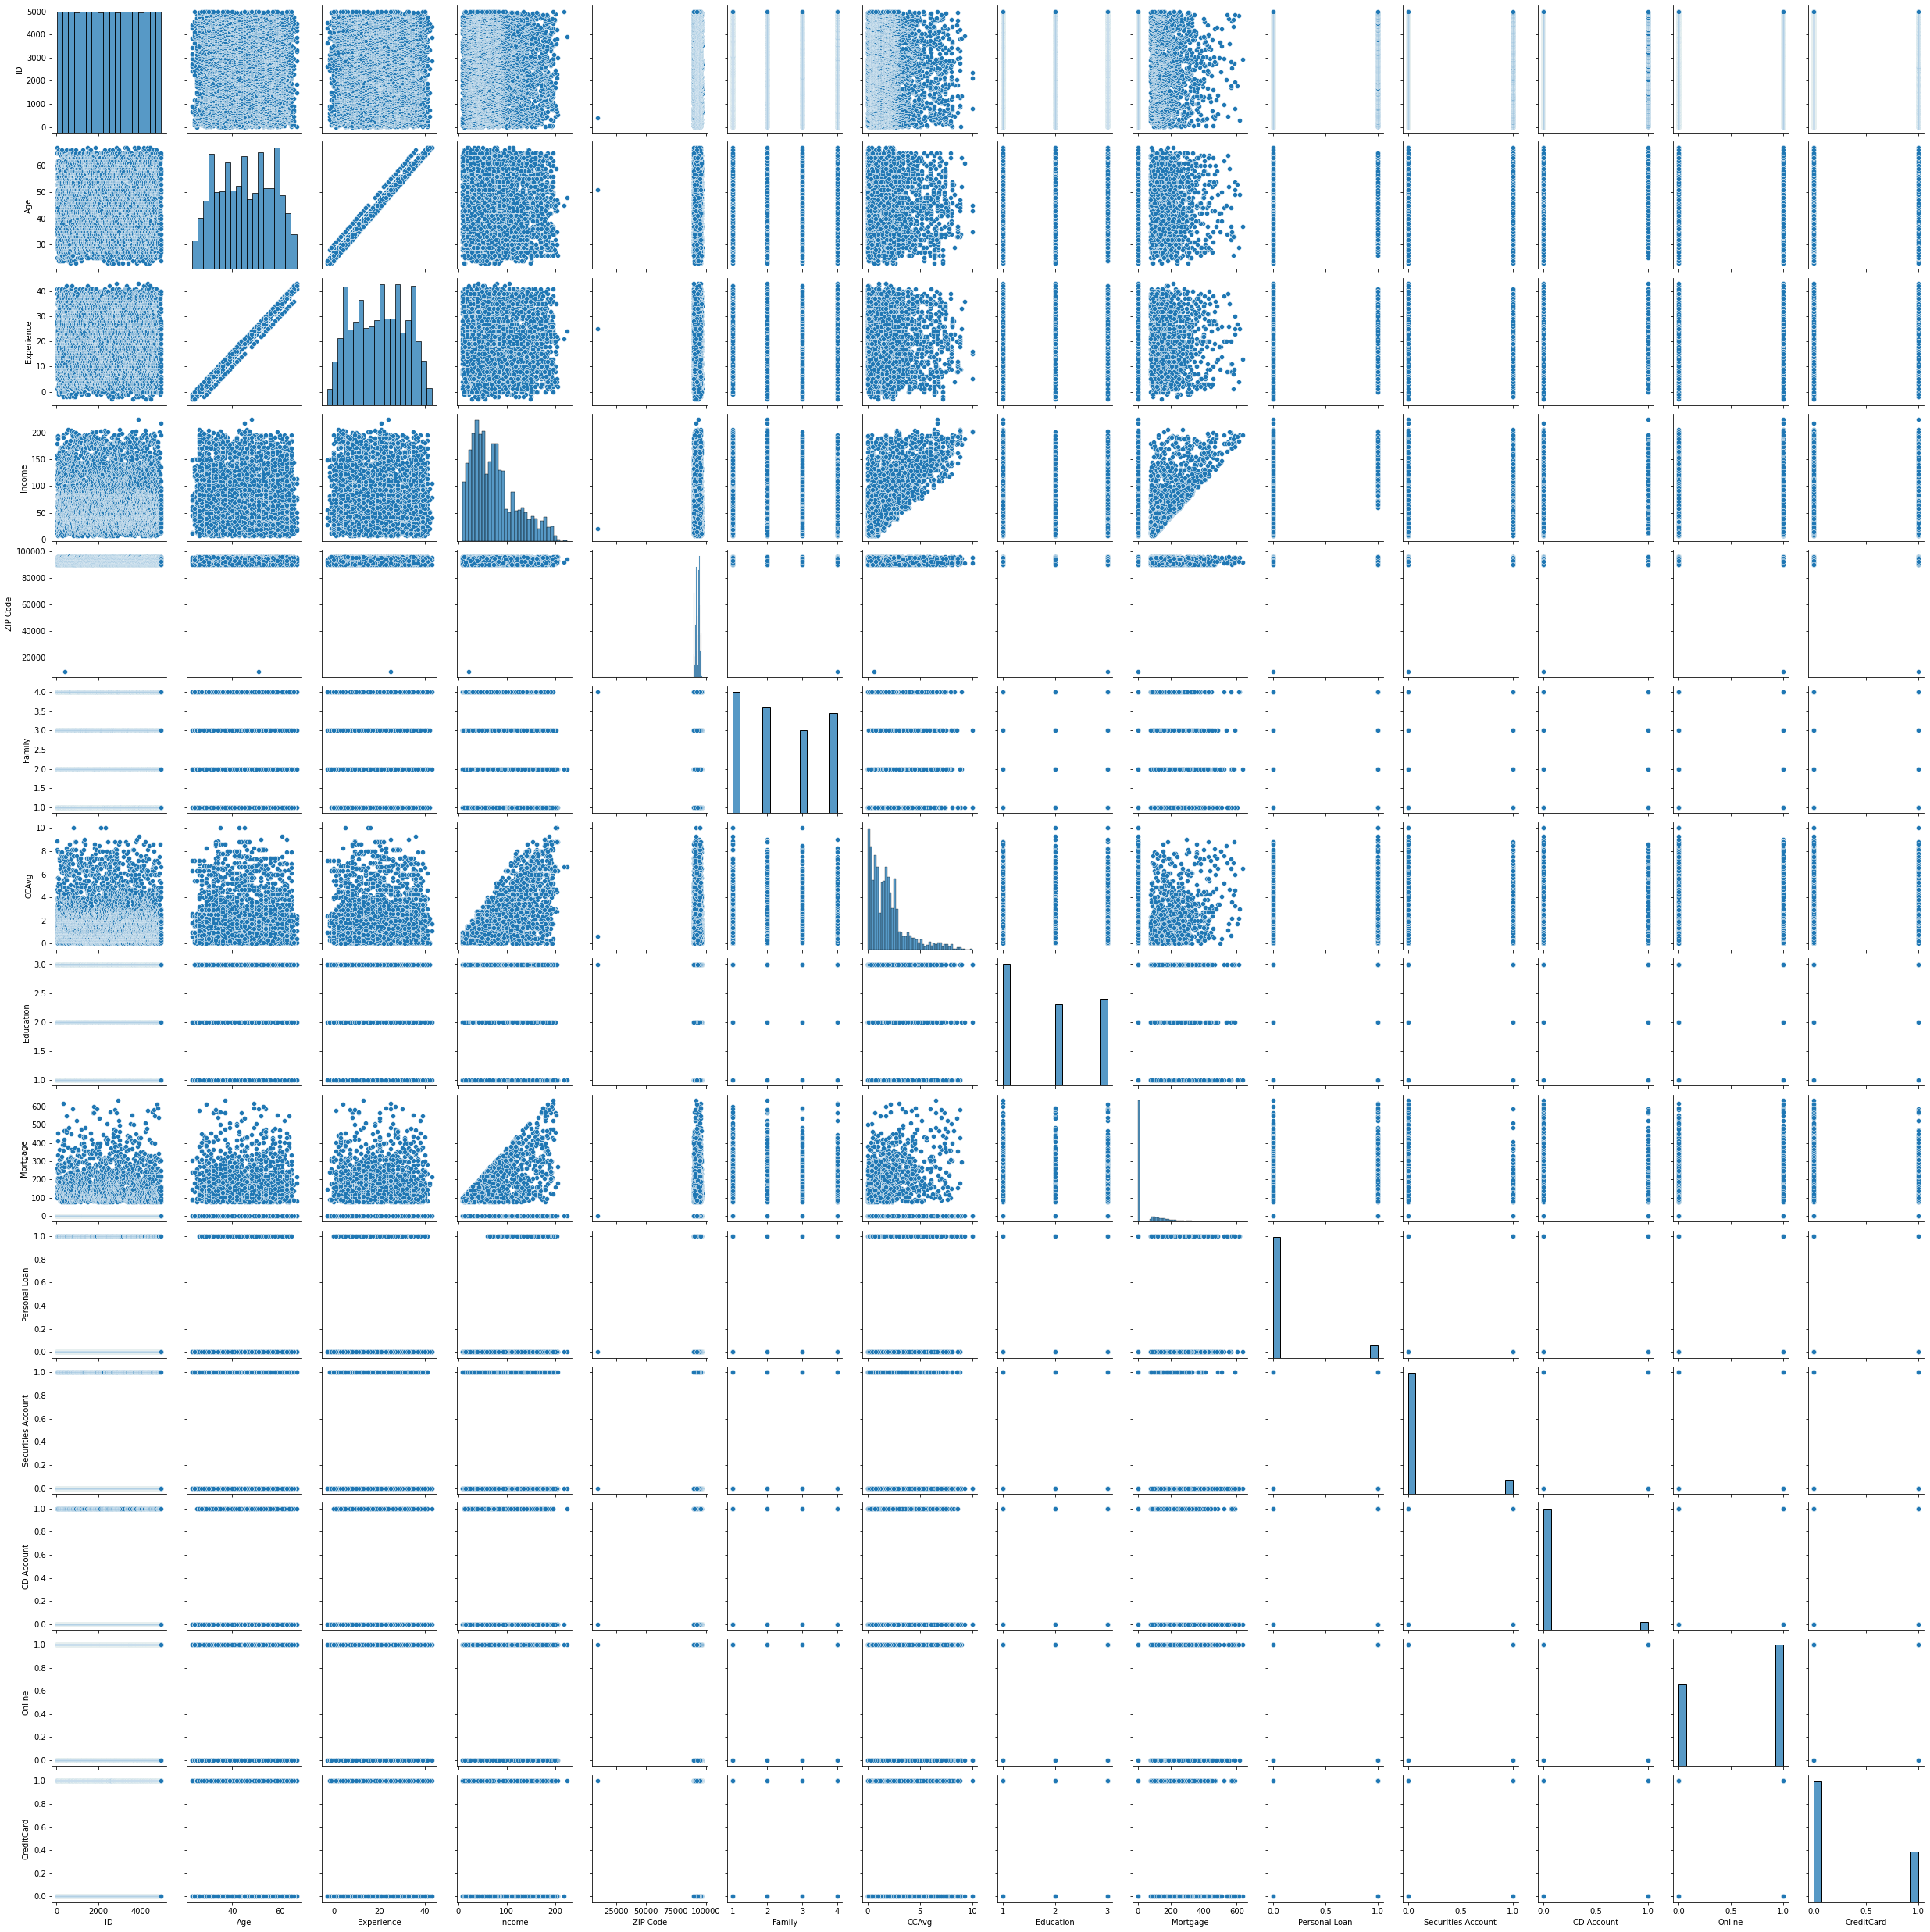

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data)

In [ ]:
t = data.copy()
t.drop('Personal Loan', axis = 'columns', inplace = True)   # removes the 'Personal Loan' column

In [ ]:
from sklearn.model_selection import train_test_split
# The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

X_train, X_test, Y_train, Y_test = train_test_split(
    t[t.columns[1:]], data['Personal Loan'], test_size = 0.2)

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

**Scaling the values**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

**Prediction model - KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

**Prediction model - Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 15000)
model.fit(X_train, Y_train)

In [ ]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

**Without ZIP Code Column**

In [ ]:
t = data.copy()
t.drop('Personal Loan', axis = 'columns', inplace = True)
t.drop('ZIP Code', axis = 'columns', inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    t[t.columns[1:]], data['Personal Loan'], test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Prediction model - KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

**Prediction model - Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 15000)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))